# Ÿæÿ±Ÿà⁄òŸá ÿ™ÿ≠ŸÑ€åŸÑ ÿ±ŸÅÿ™ÿßÿ±€å Ÿà Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿßÿ±ÿ≤ÿ¥ ÿ∑ŸàŸÑ ÿπŸÖÿ± ŸÖÿ¥ÿ™ÿ±€å ÿ®ÿ±ÿß€å €å⁄© ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ¢ŸÜŸÑÿß€åŸÜ
ÿßÿ±ÿ≤ÿ¥ ÿ∑ŸàŸÑ ÿπŸÖÿ± ŸÖÿ¥ÿ™ÿ±€å=Customer Lifetime Value

## ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å Ÿà ÿ™ŸÖ€åÿ≤⁄©ÿßÿ±€å ÿßŸàŸÑ€åŸá

### 1. ÿß€åŸÖŸæŸàÿ±ÿ™ ⁄©ÿ™ÿßÿ®ÿÆÿßŸÜŸá‚ÄåŸáÿß:

In [1]:
import pandas as pd
import numpy as np

### 2. ÿÆŸàÿßŸÜÿØŸÜ ŸÅÿß€åŸÑ:

In [2]:
df = pd.read_excel("Online Retail.xlsx")

### 3. ÿ®ÿ±ÿ±ÿ≥€å ÿßŸàŸÑ€åŸá:

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [4]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo StockCode                         Description  \
count    541909.0    541909                              540455   
unique    25900.0      4070                                4223   
top      573585.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq       1114.0      2313                                2369   
mean          NaN       NaN                                 NaN   
min           NaN       NaN                                 NaN   
25%           NaN       NaN                                 NaN   
50%           NaN       NaN                                 NaN   
75%           NaN       NaN                                 NaN   
max           NaN       NaN                                 NaN   
std           NaN       NaN                                 NaN   

             Quantity                    InvoiceDate      UnitPrice  \
count   541909.000000                         541909  541909.000000   
unique            NaN                            NaN            NaN   
top               NaN                            NaN            NaN   
freq              NaN                            NaN            NaN   
mean         9.552250  2011-07-04 13:34:57.156386048       4.611114   
min     -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%          1.000000            2011-03-28 11:34:00       1.250000   
50%          3.000000            2011-07-19 17:17:00       2.080000   
75%         10.000000            2011-10-19 11:27:00       4.130000   
max      80995.000000            2011-12-09 12:50:00   38970.000000   
std        218.081158                            NaN      96.759853   

           CustomerID         Country  
count   406829.000000          541909  
unique            NaN              38  
top               NaN  United Kingdom  
freq              NaN          495478  
mean     15287.690570             NaN  
min      12346.000000             NaN  
25%      13953.000000             NaN  
50%      15152.000000             NaN  
75%      16791.000000             NaN  
max      18287.000000             NaN  
std       1713.600303             NaN

###  4. ÿ™ŸÖ€åÿ≤⁄©ÿßÿ±€å ÿßŸàŸÑ€åŸá:

#### ÿ≠ÿ∞ŸÅ ÿ±ÿØ€åŸÅ‚ÄåŸáÿß€å ÿ®ÿØŸàŸÜ CustomerID

In [5]:
df = df[df['CustomerID'].notnull()]

#### ÿ≠ÿ∞ŸÅ ŸÖŸÇÿßÿØ€åÿ± ŸÖŸÜŸÅ€å ÿØÿ± Quantity €åÿß UnitPrice (ÿ®ÿ±⁄Øÿ¥ÿ™€å‚ÄåŸáÿß):

In [6]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

#### ÿ™ÿ®ÿØ€åŸÑ ÿ≥ÿ™ŸàŸÜ ÿ™ÿßÿ±€åÿÆ

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#### ÿ≥ÿßÿÆÿ™ ÿ≥ÿ™ŸàŸÜ TotalPrice

In [8]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## ÿ™ÿ≠ŸÑ€åŸÑ ÿß⁄©ÿ™ÿ¥ÿßŸÅ€å ÿßŸàŸÑ€åŸá (EDA)

ŸáÿØŸÅŸÖŸàŸÜ ÿß€åŸÜŸá ⁄©Ÿá:

- ÿ®ÿ®€åŸÜ€åŸÖ ÿ®ÿß ⁄ÜŸá ŸÜŸàÿπ ŸÖÿ¥ÿ™ÿ±€å‚ÄåŸáÿß€å€å ÿ≥ÿ±Ÿà⁄©ÿßÿ± ÿØÿßÿ±€åŸÖ

- ÿ±ŸÅÿ™ÿßÿ± ÿÆÿ±€åÿØ ÿ±Ÿà ÿ®ÿ¥ŸÜÿßÿ≥€åŸÖ

- ÿßŸÑ⁄ØŸàŸáÿß€å ŸæŸÜŸáÿßŸÜ ÿ±Ÿà ⁄©ÿ¥ŸÅ ⁄©ŸÜ€åŸÖ

### 1. ÿ™ÿπÿØÿßÿØ ŸÖÿ¥ÿ™ÿ±€å‚ÄåŸáÿß:

In [24]:
df['CustomerID'].nunique()

4338

### 2. Ÿæÿ±ÿß⁄©ŸÜÿØ⁄Ø€å ⁄©ÿ¥Ÿàÿ±Ÿáÿß (Top 5 ⁄©ÿ¥Ÿàÿ±):

In [10]:
df['Country'].value_counts().head(5)

Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: count, dtype: int64

### 3. Ÿæÿ±ŸÅÿ±Ÿàÿ¥‚Äåÿ™ÿ±€åŸÜ ⁄©ÿßŸÑÿßŸáÿß:

In [11]:
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

### 4. ŸÖ€åÿßŸÜ⁄Ø€åŸÜ Ÿà ŸÖÿ¨ŸÖŸàÿπ ŸÅÿ±Ÿàÿ¥

In [12]:
df['TotalPrice'].sum(), df['TotalPrice'].mean()

(8911407.904, 22.396999889415003)

###  5. ÿ™ÿπÿØÿßÿØ ÿÆÿ±€åÿØ ÿØÿ± ŸÖÿßŸá

In [13]:
df['Month'] = df['InvoiceDate'].dt.month
df['Month'].value_counts().sort_index()

Month
1     21229
2     19927
3     27175
4     22642
5     28320
6     27185
7     26825
8     27007
9     40028
10    49554
11    64531
12    43461
Name: count, dtype: int64

### 6. ŸÜŸÖŸàÿØÿßÿ± ÿ™Ÿàÿ≤€åÿπ ŸÅÿ±Ÿàÿ¥ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ™ÿπÿØÿßÿØ ŸÅÿß⁄©ÿ™Ÿàÿ± ÿØÿ± ŸÖÿßŸá

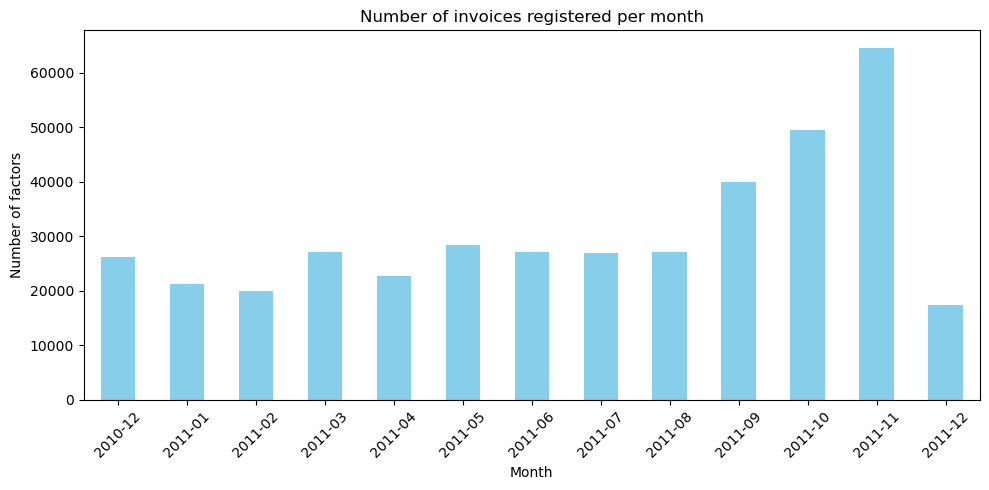

In [22]:
import matplotlib.pyplot as plt

# ÿ™ÿπÿØÿßÿØ ŸÅÿß⁄©ÿ™Ÿàÿ±Ÿáÿß ÿØÿ± Ÿáÿ± ŸÖÿßŸá
monthly_sales = df['InvoiceDate'].dt.to_period('M').value_counts().sort_index()

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ±
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Number of invoices registered per month')
plt.xlabel('Month')
plt.ylabel('Number of factors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## RFM Analysis

ŸáÿØŸÅ:

ÿ®ÿ±ÿß€å Ÿáÿ± ŸÖÿ¥ÿ™ÿ±€å €≥ ÿπÿØÿØ ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ⁄©ŸÜ€åŸÖ:

- Recency: ⁄ÜŸÜÿØ ÿ±Ÿàÿ≤ ÿßÿ≤ ÿ¢ÿÆÿ±€åŸÜ ÿÆÿ±€åÿØÿ¥ ⁄Øÿ∞ÿ¥ÿ™Ÿáÿü

- Frequency: ⁄ÜŸÜÿØ ÿ®ÿßÿ± ÿÆÿ±€åÿØ ⁄©ÿ±ÿØŸáÿü

- Monetary: ⁄ÜŸÇÿØÿ± Ÿáÿ≤€åŸÜŸá ⁄©ÿ±ÿØŸáÿü

### 1: ÿ™ÿπ€å€åŸÜ ÿ™ÿßÿ±€åÿÆ ÿ™ÿ≠ŸÑ€åŸÑ 

In [49]:
import datetime as dt

# ÿ™ÿßÿ±€åÿÆ ŸÖÿ±ÿ¨ÿπ ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®Ÿá recency
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

#reference_date = dt.datetime.today()

### 2: ÿ≥ÿßÿÆÿ™ ÿ¨ÿØŸàŸÑ RFM

In [50]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

# ÿ™ÿ∫€å€åÿ± ŸÜÿßŸÖ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40

### 3. ÿ™ÿ≠ŸÑ€åŸÑ ÿπÿØÿØ€å ÿ±Ÿà€å Recency, Frequency, Monetary

#### ÿÆŸÑÿßÿµŸá ÿ¢ŸÖÿßÿ±€å:

In [27]:
rfm.describe()

CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2054.266460
std     1721.808492   100.014169     7.697998    8989.230441
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     307.415000
50%    15299.500000    51.000000     2.000000     674.485000
75%    16778.750000   142.000000     5.000000    1661.740000
max    18287.000000   374.000000   209.000000  280206.020000

####  ŸÜŸÖŸàÿØÿßÿ± ÿ™Ÿàÿ≤€åÿπ ÿ®ÿ±ÿß€å Ÿáÿ±⁄©ÿØŸàŸÖ:

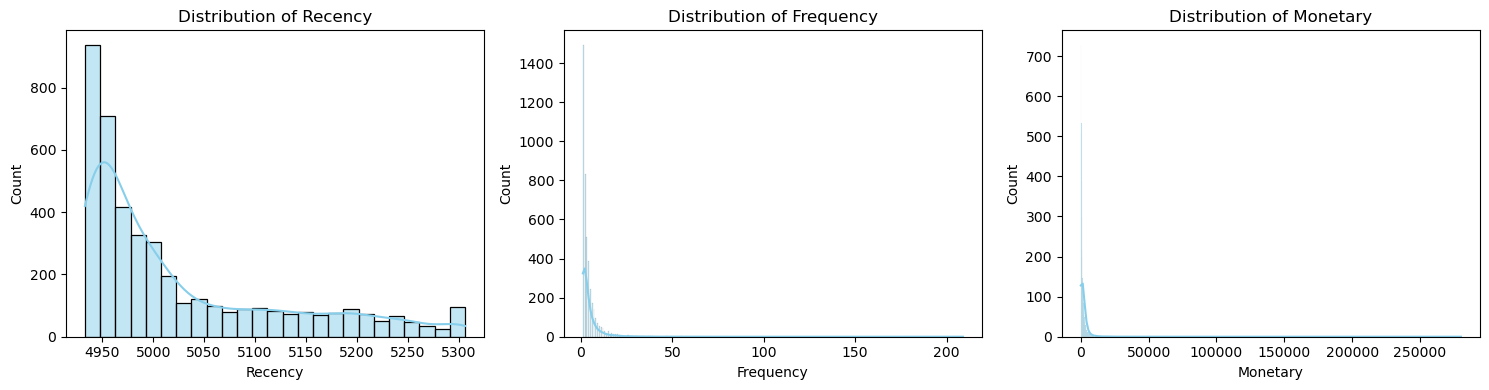

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿ®ÿß StandardScaler

 ⁄Üÿ±ÿß ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€åÿü

⁄ÜŸàŸÜ RFM ÿπÿØÿØŸáÿß€å€å ÿ®ÿß ŸÖŸÇ€åÿßÿ≥‚ÄåŸáÿß€å ÿÆ€åŸÑ€å ŸÖÿ™ŸÅÿßŸàÿ™ ÿØÿßÿ±Ÿá:

  Recency: ŸÖÿ´ŸÑÿßŸã 5 ÿ™ÿß 300 ÿ±Ÿàÿ≤

  Frequency: 1 ÿ™ÿß 50 ÿ®ÿßÿ±

  Monetary: 0 ÿ™ÿß ⁄ÜŸÜÿØ Ÿáÿ≤ÿßÿ±!

KMeans ŸÅÿßÿµŸÑŸá‚ÄåŸáÿß ÿ±Ÿà ŸÖŸÇÿß€åÿ≥Ÿá ŸÖ€å‚Äå⁄©ŸÜŸá ‚Üí ÿ®ÿß€åÿØ ŸÖŸÇ€åÿßÿ≥ ÿ®ÿ±ÿßÿ®ÿ± ÿ®ÿßÿ¥Ÿá

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

## Clustering

### ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿ¢ÿ±ŸÜÿ¨ ÿ®ÿ±ÿß€å ÿ™ÿπ€å€åŸÜ ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá ÿ®Ÿá€åŸÜŸá

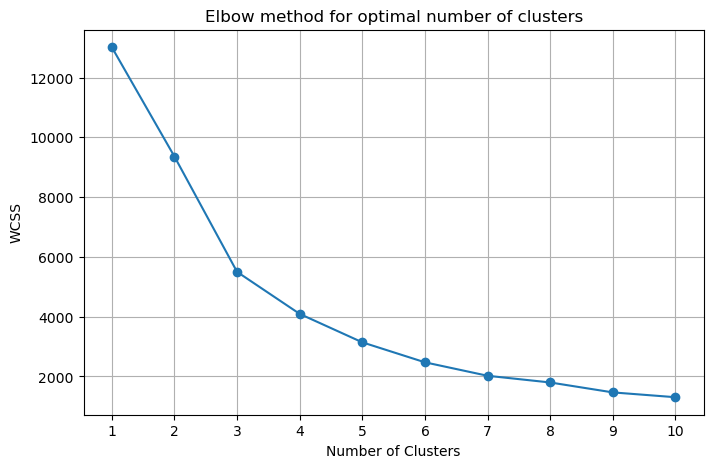

In [55]:
wcss = []
from sklearn.cluster import KMeans

# ÿ™ÿ≥ÿ™ ÿßÿ≤ 1 ÿ™ÿß 10 ÿÆŸàÿ¥Ÿá
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ±
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow method for optimal number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

**ŸÜ⁄©ÿ™Ÿá: ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÜŸÇÿ∑Ÿá‚Äå ÿØŸÇ€åŸÇÿßŸã ÿ®€åŸÜ 3 Ÿà 4 ÿÆŸàÿ¥Ÿá**

 ÿ≥Ÿá ÿÆŸàÿ¥Ÿá: ÿ≥ÿßÿØŸá‚Äåÿ™ÿ±ÿå ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ŸÖÿπŸÖŸàŸÑÿßŸã Ÿàÿßÿ∂ÿ≠‚Äåÿ™ÿ±
 
 ⁄ÜŸáÿßÿ± ÿÆŸàÿ¥Ÿá: ÿ¨ÿ≤ÿ¶€åÿßÿ™ ÿ®€åÿ¥ÿ™ÿ±ÿå ÿ¥ÿß€åÿØ ÿ™ŸÖÿß€åÿ≤ ÿØŸÇ€åŸÇ‚Äåÿ™ÿ±€å ÿØÿ± ŸÖÿ¥ÿ™ÿ±€å‚ÄåŸáÿß

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

### ÿ™ÿ≠ŸÑ€åŸÑ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß

ŸÖ€åÿßŸÜ⁄Ø€åŸÜ RFM ÿ®ÿ±ÿß€å Ÿáÿ± ÿÆŸàÿ¥Ÿá:

In [69]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

Recency  Frequency  Monetary
Cluster                              
0           43.7        3.7    1359.0
1          248.1        1.6     480.6
2            7.4       82.5  127338.3
3           15.5       22.3   12709.1

### ÿ®ÿµÿ±€å‚Äåÿ≥ÿßÿ≤€å ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿ®ÿß PCA

#### ÿßÿ¨ÿ±ÿß€å PCA

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

#### ÿ≥ÿßÿÆÿ™ DataFrame ÿ®ÿµÿ±€å‚Äåÿ≥ÿßÿ≤€å

In [71]:
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = rfm['Cluster']

#### ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß

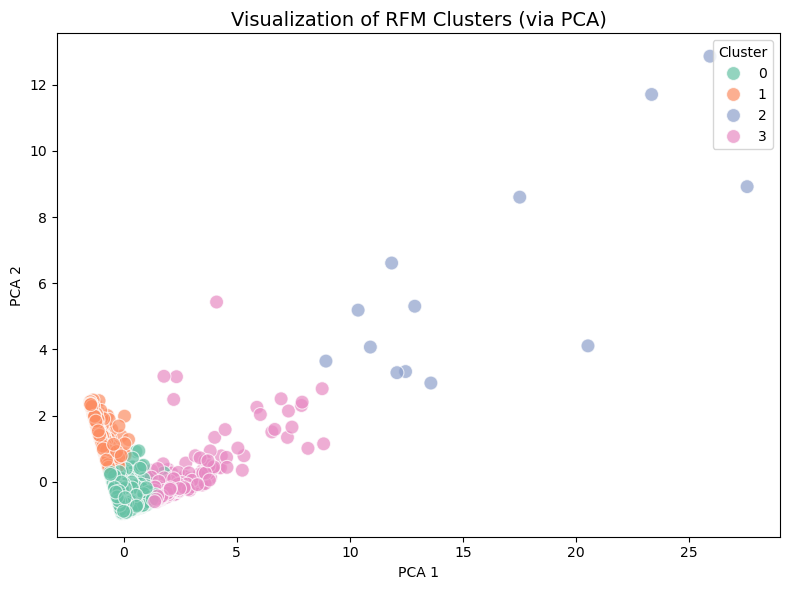

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set2',
    alpha=0.7,
    s=100
)

plt.title('Visualization of RFM Clusters (via PCA)', fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

ÿß€åŸÜ ŸÜŸÖŸàÿØÿßÿ± ŸÜÿ¥ŸàŸÜ ŸÖ€å‚ÄåÿØŸá ⁄©Ÿá:

- ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿßÿ≤ ŸáŸÖ ÿ¨ÿØÿß Ÿáÿ≥ÿ™ŸÜ €åÿß ÿØÿ± ŸáŸÖ Ÿæ€å⁄Ü€åÿØŸÜÿü

- ÿ¢€åÿß ÿÆŸàÿ¥Ÿá‚Äåÿß€å ÿÆ€åŸÑ€å ŸÖÿ™ÿ±ÿß⁄©ŸÖ €åÿß ŸæÿÆÿ¥ ÿ¥ÿØŸá‚Äåÿ≥ÿ™ÿü 

- ŸÖÿ¥ÿ™ÿ±€å‚ÄåŸáÿß€å VIP €åÿß ÿ±Ÿáÿßÿ¥ÿØŸá ÿ™Ÿà€å ⁄©ÿØŸàŸÖ ŸÜÿßÿ≠€åŸá Ÿáÿ≥ÿ™ŸÜÿü

##### €±. ⁄Üÿ±ÿß ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿ®Ÿá ŸáŸÖ ⁄Üÿ≥ÿ®€åÿØŸÜÿü

- ÿØÿßÿØŸá‚ÄåŸáÿß€å RFM ŸÅŸÇÿ∑ €≥ Ÿà€å⁄ò⁄Ø€å ÿØÿßÿ±ŸÜ (Recency, Frequency, Monetary)

- ŸÖŸÇÿßÿØ€åÿ± ÿÆ€åŸÑ€å ÿßÿ≤ ŸÖÿ¥ÿ™ÿ±€å‚ÄåŸáÿß ÿØÿ± ÿß€åŸÜ ÿ≥Ÿá Ÿà€å⁄ò⁄Ø€å ÿ®Ÿá ŸáŸÖ ŸÜÿ≤ÿØ€å⁄©Ÿá

- PCA ŸÅŸÇÿ∑ €≤ ŸÖÿ≠Ÿàÿ± ŸÖ€å‚Äåÿ≥ÿßÿ≤Ÿá Ÿà ŸÖŸÖ⁄©ŸÜŸá ÿ¨ÿØÿß⁄©ŸÜŸÜÿØ⁄Ø€å ⁄©ÿßŸÖŸÑ ÿ±Ÿà ŸÜÿ¥ŸàŸÜ ŸÜÿØŸá
(ŸÖŸÖ⁄©ŸÜŸá ÿØÿ± ÿ®ÿπÿØ ÿ≥ŸàŸÖ €åÿß ⁄ÜŸáÿßÿ±ŸÖ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ⁄©ÿßŸÖŸÑÿßŸã ÿ¨ÿØÿß ÿ®ÿßÿ¥ŸÜ)

#####  €≤. ÿ¢€åÿß ÿ®Ÿá ŸÖÿπŸÜ€å ÿ®ÿØ ÿ®ŸàÿØŸÜ ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€åŸáÿü

ŸÜŸá ŸÑÿ≤ŸàŸÖÿßŸã ‚ùå

⁄Üÿ≥ÿ®€åÿØŸÜ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿØÿ± ŸÜŸÖŸàÿØÿßÿ± PCA ŸÅŸÇÿ∑ ŸÜÿ¥ŸàŸÜ ŸÖ€å‚ÄåÿØŸá:

-  ÿ®€åŸÜ ÿ®ÿπÿ∂€å ÿßÿ≤ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿ™ÿØÿßÿÆŸÑ ŸÜÿ≥ÿ®€å Ÿáÿ≥ÿ™

-  ŸàŸÑ€å ŸáŸÜŸàÿ≤ ŸÖŸÖ⁄©ŸÜŸá ÿßÿ≤ ŸÜÿ∏ÿ± Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß€å ÿπÿØÿØ€å ⁄©ÿßŸÖŸÑÿßŸã ŸÖÿπŸÜ€å‚ÄåÿØÿßÿ± Ÿà ÿ¨ÿØÿß ÿ®ÿßÿ¥ŸÜ

### Ÿæÿ±ŸàŸÅÿß€åŸÑ ÿ±ŸÅÿ™ÿßÿ±€å ŸÖÿ¥ÿ™ÿ±€å

#### ÿ≥ÿßÿÆÿ™ ÿ¨ÿØŸàŸÑ summary ÿ®ÿ±ÿß€å Ÿáÿ± ÿÆŸàÿ¥Ÿá

In [73]:
summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].agg(
    ['mean', 'median', 'min', 'max']
).round(1)

summary

Recency                  Frequency                  Monetary  \
           mean median  min  max      mean median min  max      mean   
Cluster                                                                
0          43.7   32.0    1  163       3.7    3.0   1   15    1359.0   
1         248.1  243.0  143  374       1.6    1.0   1   12     480.6   
2           7.4    2.0    1   39      82.5   63.0   2  209  127338.3   
3          15.5    5.0    1  372      22.3   19.0   1   93   12709.1   

                                      
           median      min       max  
Cluster                               
0           829.3      6.2   21429.4  
1           310.5      3.8    9864.3  
2        117379.6  33719.7  280206.0  
3          8037.7   1296.4   77183.6

**:ÿ™ÿ≠ŸÑ€åŸÑ ÿÆÿ±Ÿàÿ¨€å**

- ÿÆŸàÿ¥Ÿá 0:

ŸÖÿ¥ÿ™ÿ±€å ŸÖÿπŸÖŸàŸÑ€å €åÿß ÿ™ÿßÿ≤Ÿá‚ÄåŸàÿßÿ±ÿØ

Recency ŸÖÿ™Ÿàÿ≥ÿ∑ÿå Frequency ⁄©ŸÖÿå Monetary Ÿæÿß€å€åŸÜ

- ÿÆŸàÿ¥Ÿá 1:

ŸÖÿ¥ÿ™ÿ±€å ÿ∫€åÿ±ŸÅÿπÿßŸÑ €åÿß ÿ±Ÿáÿßÿ¥ÿØŸá

Recency ÿÆ€åŸÑ€å ÿ≤€åÿßÿØÿå ÿÆÿ±€åÿØ Ÿà Ÿáÿ≤€åŸÜŸá ⁄©ŸÖ

- ÿÆŸàÿ¥Ÿá 2:

ŸÖÿ¥ÿ™ÿ±€å ŸàŸÅÿßÿØÿßÿ± Ÿà VIP

Recency ÿ®ÿ≥€åÿßÿ± ⁄©ŸÖÿå Frequency Ÿà Monetary ÿ®ÿ≥€åÿßÿ± ÿ®ÿßŸÑÿß

- ÿÆŸàÿ¥Ÿá 3:

 ŸÖÿ¥ÿ™ÿ±€å ŸÅÿπÿßŸÑ Ÿà ÿÆŸàÿ®

Recency ⁄©ŸÖÿå Frequency Ÿà Monetary ÿ®ÿßŸÑÿß


In [78]:
profile = {
    2: "VIP: ŸàŸÅÿßÿØÿßÿ±ÿå Ÿæÿ±ÿ™⁄©ÿ±ÿßÿ±ÿå ŸàŸÑÿÆÿ±ÿ¨",
    3: "ŸÅÿπÿßŸÑ: ÿßÿÆ€åÿ±ÿßŸã ÿÆÿ±€åÿØ ⁄©ÿ±ÿØŸáÿå ÿÆÿ±€åÿØ ÿ≤€åÿßÿØ Ÿà ŸÖÿ™Ÿàÿ≥ÿ∑",
    0: "ŸÖÿπŸÖŸàŸÑ€å €åÿß ÿ¨ÿØ€åÿØ: ÿÆÿ±€åÿØ ⁄©ŸÖÿå ŸÜŸá ÿÆ€åŸÑ€å ŸÇÿØ€åŸÖ",
    1: "ÿÆÿßŸÖŸàÿ¥‚Äåÿ¥ÿØŸá: ÿØ€åÿ± ÿÆÿ±€åÿØ ⁄©ÿ±ÿØŸáÿå ÿÆÿ±€åÿØ ⁄©ŸÖ Ÿà Ÿáÿ≤€åŸÜŸá Ÿæÿß€å€åŸÜ"
}

rfm['Segment'] = rfm['Cluster'].map(profile)

In [79]:
rfm['Segment']

0             ŸÅÿπÿßŸÑ: ÿßÿÆ€åÿ±ÿßŸã ÿÆÿ±€åÿØ ⁄©ÿ±ÿØŸáÿå ÿÆÿ±€åÿØ ÿ≤€åÿßÿØ Ÿà ŸÖÿ™Ÿàÿ≥ÿ∑
1                 ŸÖÿπŸÖŸàŸÑ€å €åÿß ÿ¨ÿØ€åÿØ: ÿÆÿ±€åÿØ ⁄©ŸÖÿå ŸÜŸá ÿÆ€åŸÑ€å ŸÇÿØ€åŸÖ
2                 ŸÖÿπŸÖŸàŸÑ€å €åÿß ÿ¨ÿØ€åÿØ: ÿÆÿ±€åÿØ ⁄©ŸÖÿå ŸÜŸá ÿÆ€åŸÑ€å ŸÇÿØ€åŸÖ
3                 ŸÖÿπŸÖŸàŸÑ€å €åÿß ÿ¨ÿØ€åÿØ: ÿÆÿ±€åÿØ ⁄©ŸÖÿå ŸÜŸá ÿÆ€åŸÑ€å ŸÇÿØ€åŸÖ
4       ÿÆÿßŸÖŸàÿ¥‚Äåÿ¥ÿØŸá: ÿØ€åÿ± ÿÆÿ±€åÿØ ⁄©ÿ±ÿØŸáÿå ÿÆÿ±€åÿØ ⁄©ŸÖ Ÿà Ÿáÿ≤€åŸÜŸá Ÿæÿß€å€åŸÜ
                             ...                       
4333    ÿÆÿßŸÖŸàÿ¥‚Äåÿ¥ÿØŸá: ÿØ€åÿ± ÿÆÿ±€åÿØ ⁄©ÿ±ÿØŸáÿå ÿÆÿ±€åÿØ ⁄©ŸÖ Ÿà Ÿáÿ≤€åŸÜŸá Ÿæÿß€å€åŸÜ
4334    ÿÆÿßŸÖŸàÿ¥‚Äåÿ¥ÿØŸá: ÿØ€åÿ± ÿÆÿ±€åÿØ ⁄©ÿ±ÿØŸáÿå ÿÆÿ±€åÿØ ⁄©ŸÖ Ÿà Ÿáÿ≤€åŸÜŸá Ÿæÿß€å€åŸÜ
4335              ŸÖÿπŸÖŸàŸÑ€å €åÿß ÿ¨ÿØ€åÿØ: ÿÆÿ±€åÿØ ⁄©ŸÖÿå ŸÜŸá ÿÆ€åŸÑ€å ŸÇÿØ€åŸÖ
4336          ŸÅÿπÿßŸÑ: ÿßÿÆ€åÿ±ÿßŸã ÿÆÿ±€åÿØ ⁄©ÿ±ÿØŸáÿå ÿÆÿ±€åÿØ ÿ≤€åÿßÿØ Ÿà ŸÖÿ™Ÿàÿ≥ÿ∑
4337              ŸÖÿπŸÖŸàŸÑ€å €åÿß ÿ¨ÿØ€åÿØ: ÿÆÿ±€åÿØ ⁄©ŸÖÿå ŸÜŸá ÿÆ€åŸÑ€å ŸÇÿØ€åŸÖ
Name: Segment, Length: 4338, dtype: object

## ŸÖÿØŸÑÿ≥ÿßÿ≤€å Ÿæ€åÿ¥ ÿ®€åŸÜ€å

### ŸáÿØŸÅ ŸÖÿØŸÑ: ÿ¢€åÿß €å⁄© ŸÖÿ¥ÿ™ÿ±€å ÿØÿ± ÿ¢€åŸÜÿØŸá ÿ®Ÿá ÿÆŸàÿ¥Ÿá "ÿÆÿßŸÖŸàÿ¥‚Äåÿ¥ÿØŸá"  ÿÆŸàÿßŸáÿØ ÿ±ŸÅÿ™ €åÿß ŸÜŸáÿü

(ÿ¢€åÿß ŸÖÿ¥ÿ™ÿ±€å ÿØÿßÿ±Ÿá ÿ∫€åÿ±ŸÅÿπÿßŸÑ ŸÖ€å‚Äåÿ¥Ÿáÿü)

#### ÿ™ÿπÿ±€åŸÅ ŸÖÿ≥ÿ¶ŸÑŸá:

ŸÖÿß €åŸá ŸÖÿØŸÑ ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å (classification) ŸÖ€å‚Äåÿ≥ÿßÿ≤€åŸÖ ⁄©Ÿá:

    Ÿàÿ±ŸàÿØ€å: Recencyÿå Frequencyÿå Monetary

    ÿÆÿ±Ÿàÿ¨€å: €± (ÿÆÿßŸÖŸàÿ¥ ÿ¥ÿØŸá) €åÿß €∞ (ŸÜŸá)

####  €±: ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá

In [81]:
# ŸáÿØŸÅ: ÿ¢€åÿß ŸÖÿ¥ÿ™ÿ±€å ÿØÿ± Cluster 1 Ÿáÿ≥ÿ™ÿü
rfm['Inactive'] = (rfm['Cluster'] == 1).astype(int)

# Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Inactive']


#### €≤: ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### €≥: ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### €¥: ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ

In [86]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[655   0]
 [  0 213]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       655
           1       1.00      1.00      1.00       213

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



**ÿÆÿ±Ÿàÿ¨€å ŸÖÿØŸÑ:**

- accuracy: 1.00 (100Ÿ™ ÿØŸÇÿ™):

ŸÖÿØŸÑ ŸáŸÖŸá ⁄Ü€åÿ≤ ÿ±Ÿà ÿØÿ±ÿ≥ÿ™ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ⁄©ÿ±ÿØŸá

- precision Ÿà recall ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ŸÑÿßÿ≥ ŸáŸÖ 1.00:

ÿ®ÿØŸàŸÜ ÿßÿ¥ÿ™ÿ®ÿßŸá!

**ÿ≥ÿ§ÿßŸÑ ŸÖŸáŸÖ: ÿ¢€åÿß ÿß€åŸÜ ÿÆŸàÿ®Ÿá €åÿß ÿ≤€åÿßÿØ€å ÿÆŸàÿ®Ÿáÿü**

ŸÖŸÖ⁄©ŸÜŸá:

- ŸÖÿØŸÑ ÿÆ€åŸÑ€å ÿ≥ÿßÿØŸá ÿ¥ÿØŸá ÿ®ÿßÿ¥Ÿá (ŸÖÿ´ŸÑÿßŸã ÿØÿßÿØŸá‚ÄåŸáÿß ÿÆ€åŸÑ€å ÿ™ŸÖ€åÿ≤ Ÿà ÿ¨ÿØÿß ÿ®ŸàÿØŸÜ)

- €åÿß ÿ¥ÿß€åÿØ overfitting ÿßÿ™ŸÅÿßŸÇ ÿßŸÅÿ™ÿßÿØŸá (ŸÖÿØŸÑ ŸÅŸÇÿ∑ ŸáŸÖŸàŸÜ ÿØÿßÿØŸá ÿ±Ÿà ÿ≠ŸÅÿ∏ ⁄©ÿ±ÿØŸá)

- €åÿß ÿ¥ÿß€åÿØ ŸàÿßŸÇÿπÿßŸã ÿØÿßÿØŸá‚ÄåŸáÿß ŸÇÿßÿ®ŸÑ ÿ™ŸÅ⁄©€å⁄© ⁄©ÿßŸÖŸÑ ÿ®ŸàÿØŸÜ

**⁄Üÿ∑Ÿàÿ± ŸÖÿ∑ŸÖÿ¶ŸÜ ÿ®ÿ¥€åŸÖÿü**

- €åŸá ÿ®ÿßÿ± ÿ®ÿß ŸÖÿØŸÑ ÿ≥ÿßÿØŸá‚Äåÿ™ÿ± ŸÖÿ´ŸÑ Logistic Regression ÿ™ÿ≥ÿ™ ⁄©ŸÜ€åŸÖ

- ÿßÿ≤ cross-validation €åÿß ÿØÿßÿØŸá‚Äå€å ÿ¨ÿØ€åÿØ ÿ®ÿ±ÿß€å ÿ™ÿ≥ÿ™ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ŸÜ€åŸÖ

- ŸÖŸáŸÖ‚Äåÿ™ÿ±: ÿ®ÿ±ÿ±ÿ≥€å ⁄©ŸÜ€åŸÖ ⁄©Ÿá ÿ¢€åÿß Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß€å€å ⁄©Ÿá ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ÿ±ÿØ€åŸÖ (R, F, M) ŸàÿßŸÇÿπÿßŸã ŸÖŸÜÿ∑ŸÇ€å ÿ¨ÿØÿß ⁄©ÿ±ÿØŸÜ €åÿß ŸÜŸá

**ŸÜÿ™€åÿ¨Ÿá‚Äå⁄Ø€åÿ±€å:**

 - ÿß⁄ØŸá ŸàÿßŸÇÿπÿßŸã ŸÖÿ¥ÿ™ÿ±€å‚ÄåŸáÿß€å ÿÆÿßŸÖŸàÿ¥‚Äåÿ¥ÿØŸá ÿ±ŸÅÿ™ÿßÿ± ⁄©ÿßŸÖŸÑÿßŸã ŸÖÿ™ŸÅÿßŸàÿ™€å ÿØÿßÿ±ŸÜÿå ÿß€åŸÜ ŸÖÿØŸÑ ÿ®Ÿá‚ÄåÿØÿ±ÿØ ⁄©ŸÖŸæ€åŸÜ‚ÄåŸáÿß€å ÿ®ÿ±⁄Øÿ¥ÿ™ ŸÖÿ¥ÿ™ÿ±€å ŸÖ€å‚ÄåÿÆŸàÿ±Ÿá 
 
 - ŸÖ€å‚Äåÿ™ŸàŸÜ€å ÿ®ÿ±ÿßÿ¥ŸàŸÜ ÿß€åŸÖ€åŸÑ €åÿß ÿ™ÿÆŸÅ€åŸÅ Ÿà€å⁄òŸá ÿßÿ±ÿ≥ÿßŸÑ ⁄©ŸÜ€åŸÖ  

 - €åÿß Ÿáÿ¥ÿØÿßÿ± ÿ®ÿØ€åŸÖ ⁄©Ÿá ¬´ŸÖÿ¥ÿ™ÿ±€å ÿØÿ± ÿÆÿ∑ÿ± ÿßÿ≤ ÿØÿ≥ÿ™ ÿ±ŸÅÿ™ŸÜŸá ¬ª

## ÿ≥ÿßÿÆÿ™ ÿØÿßÿ¥ÿ®Ÿàÿ±ÿØ PowerBI

### ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ŸÅÿß€åŸÑ ÿ®ÿ±ÿß€å PowerBI

1.ÿ≥ÿßÿÆÿ™ ŸÅÿß€åŸÑ CSV ÿßÿ≤ RFM ŸÜŸáÿß€å€å:

In [87]:
rfm.to_csv("rfm_clusters.csv", index=False)

2.ŸÅÿß€åŸÑ rfm_clusters.csv ÿ±Ÿà ÿ™Ÿà Power BI Ÿàÿßÿ±ÿØ ⁄©ŸÜ€åŸÖ: 

ÿßÿ≤ Power BI Desktop ‚Üí Home > Get Data > Text/CSV

### Ÿà€å⁄òŸàÿßŸÑ‚ÄåŸáÿß€å€å ⁄©Ÿá ŸÖ€åÿ≥ÿßÿ≤€åŸÖ

-  Pie chart €åÿß Bar chart:

ÿ™ÿπÿØÿßÿØ ŸÖÿ¥ÿ™ÿ±€å ÿØÿ± Ÿáÿ± ÿÆŸàÿ¥Ÿá

-  Column chart:

ŸÖ€åÿßŸÜ⁄Ø€åŸÜ Recency, Frequency, Monetary ÿ®ÿ±ÿß€å Ÿáÿ± ÿÆŸàÿ¥Ÿá

- Table:

CustomerID + Segment + Monetary

- Slicer:

ŸÅ€åŸÑÿ™ÿ± ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß €åÿß Segment

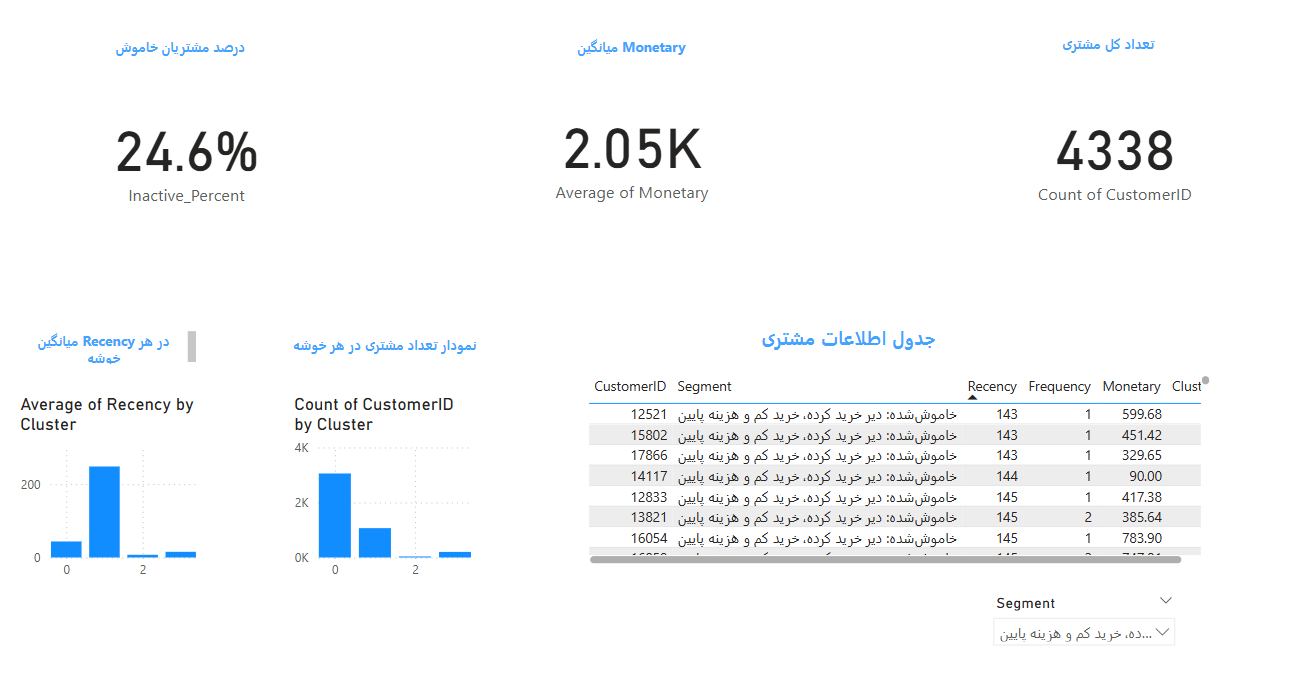

## ŸÜÿ≥ÿÆŸá ÿ¢ŸÜŸÑÿß€åŸÜ ÿ®ÿß Streamlit

 ŸáÿØŸÅ:
    
- ÿ≥ÿßÿÆÿ™ ÿßŸæ  Streamlit ÿ®ÿ±ÿß€å ŸÜŸÖÿß€åÿ¥:
    
-  ÿßÿ∑ŸÑÿßÿπÿßÿ™ RFM ŸÖÿ¥ÿ™ÿ±€å‚ÄåŸáÿß
    
-   ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß Ÿà Segment
    
-  ÿ¨ÿØŸàŸÑ ŸÅ€åŸÑÿ™ÿ±ÿ¥ŸàŸÜÿØŸá
    
  - ŸÜŸÖŸàÿØÿßÿ± ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ÿ®ÿß ÿßŸÜÿ™ÿÆÿßÿ® ÿØÿ≥ÿ™Ÿá‚Äåÿ®ŸÜÿØ€å

### 1: ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ŸÖÿ≠€åÿ∑
ŸÜÿµÿ® Streamlit:

In [88]:
pip install streamlit

###  2: ÿ≥ÿßÿÆÿ™ ŸÅÿß€åŸÑ app.py

ÿ≥ÿßÿÆÿ™ŸÜ €å⁄© ŸÅÿß€åŸÑ ÿ¨ÿØ€åÿØ ÿ®Ÿá ŸÜÿßŸÖ: app.py

import streamlit as st

import pandas as pd

#ÿÆŸàÿßŸÜÿØŸÜ ÿØÿßÿØŸá

df = pd.read_csv('rfm_clusters.csv')

st.title("üìä ÿØÿßÿ¥ÿ®Ÿàÿ±ÿØ ÿ™ÿ≠ŸÑ€åŸÑ€å ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ")

#ÿßŸÜÿ™ÿÆÿßÿ® Segment

segment = st.selectbox("€å⁄© Segment ÿßŸÜÿ™ÿÆÿßÿ® ⁄©ŸÜ:", options=df['Segment'].unique())

#ŸÅ€åŸÑÿ™ÿ± ÿØÿßÿØŸá ÿ®ÿ± ÿßÿ≥ÿßÿ≥ Segment

filtered = df[df['Segment'] == segment]

#ŸÜŸÖÿß€åÿ¥ ÿØÿßÿØŸá‚ÄåŸáÿß

st.subheader("üìã ŸÑ€åÿ≥ÿ™ ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ÿØÿ± ÿß€åŸÜ Segment:")

st.dataframe(filtered[['CustomerID', 'Recency', 'Frequency', 'Monetary']])

#ÿ¢ŸÖÿßÿ± ⁄©ŸÑ€åÿØ€å

st.subheader("üìà ÿ¢ŸÖÿßÿ± ÿÆŸÑÿßÿµŸá:")

st.metric("ÿ™ÿπÿØÿßÿØ ŸÖÿ¥ÿ™ÿ±€å", len(filtered))

st.metric("ŸÖ€åÿßŸÜ⁄Ø€åŸÜ Monetary", round(filtered['Monetary'].mean(), 2))


### 3: ÿßÿ¨ÿ±ÿß€å ÿ®ÿ±ŸÜÿßŸÖŸá

ÿ™Ÿà ŸáŸÖŸàŸÜ ŸÅŸàŸÑÿØÿ± ŸÅÿß€åŸÑ app.pyÿå ÿ™Ÿà€å ÿ™ÿ±ŸÖ€åŸÜÿßŸÑ €åÿß ÿ¢ŸÜÿß⁄©ŸàŸÜÿØÿß:

streamlit run app.py

Ÿà ÿµŸÅÿ≠Ÿá Streamlit ÿ®ÿßÿ≤ ŸÖ€å‚Äåÿ¥Ÿá ÿ®ÿß URL ŸÖÿ´ŸÑ:

http://localhost:8501

### 4: ⁄Øÿ≥ÿ™ÿ±ÿ¥ ÿßŸæ

- ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ŸÜŸÖŸàÿØÿßÿ± ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß

- KPI Ÿáÿß

- ÿ¨ÿ≥ÿ™ÿ¨Ÿà€å CustomerID

- Ÿà ÿØÿ± ŸÜŸáÿß€åÿ™ Deploy ÿ±Ÿà€å Cloud (ŸÖÿ´ŸÑÿßŸã Streamlit Cloud €åÿß Render)